<a href="https://colab.research.google.com/github/hanbeen1992/project/blob/main/KaggleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 Kaggle Machine Learning & Data Science Survey 팀 프로젝트 제출내용

## Comparative analysis of KOR, CH, JAP, and USA



In [ ]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly import graph_objects
import plotly.figure_factory as ff
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

kaggle은 세계적으로 유명한 예측 모델 및 분벗 경재 플랫폼이다. 수많은 기업과 조직이 데이터와 과제를 등록하여 데이터과학자는 이를 해결하기위한 모델을 개발하고 경쟁한다. 이번 kaggle 설문조사는 직업에 종사하거나 취업을 위해 공부하는 사람들의 데이터에 초점을 맞추고 있다. 이를 비교분석하고, 미국을 비롯한 3개국의 IT산업의 발전 정도를 비교하였다.

In [ ]:
df_2021 = pd.read_csv('/content/kaggle_survey_2021_responses.csv')
df_2018 = pd.read_csv('/content/kaggle_survey_2021_responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df_2021_data= df_2021[df_2021['Q3'].isin(['United States of America', 'Japan', 'China', 'South Korea'])].reset_index(drop=True)
df_2021_asia = df_2021[df_2021['Q3'].isin(['Japan', 'China', 'South Korea'])].reset_index(drop=True)
df_2021_usa = df_2021[df_2021['Q3'].isin(['United States of America'])].reset_index(drop=True)
df_2018_data= df_2018[df_2018['Q3'].isin(['United States of America', 'Japan', 'China', 'South Korea'])]

In [ ]:
df_2021_data['Q3'].replace(['United States of America', 'South Korea', 'Japan', 'China'],['USA', 'KOR', 'JAP', 'CH'], inplace=True)
df_2021_asia['Q3'].replace(['South Korea', 'Japan', 'China'],['KOR', 'JAP', 'CH'], inplace=True)
df_2021_usa['Q3'].replace('United States of America', 'USA', inplace=True)
df_2018_data['Q3'].replace(['United States of America', 'South Korea', 'Japan', 'China'],['USA', 'KOR', 'JAP', 'CH'], inplace=True)
df_2021_data['Q4'].replace(['Some college/university study without earning a bachelor’s degree', 'No formal education past high school'],['Vocational college', 'A high school graduate'], inplace=True)

Kaggle 설문조사의 총 응답자 수는 2018년에 2021년과 비슷한 수준으로 비교되었다.

In [ ]:
q3_df_2018= df_2018_data.groupby(['Q3']).size().reset_index().rename(columns = {0:"Count"})
q3_df_2021= df_2021_data.groupby(['Q3']).size().reset_index().rename(columns = {0:"Count"})

fig = go.Figure()
fig.add_trace(go.Bar(
             x= q3_df_2021['Q3'],
             y=q3_df_2021['Count'],
             text = q3_df_2021['Count'],
             name='2021 of Kaggle User'
            ))
fig.add_trace(go.Bar(
             x= q3_df_2018['Q3'],
             y=q3_df_2018['Count'],
             text = q3_df_2018['Count'],
             name='2018 of Kaggle User'
            ))
 
fig.update_layout(barmode='group', xaxis_tickangle=-30,showlegend=True,
                 template = "plotly_white", title='2021 of Kaggle users')     
fig.show()

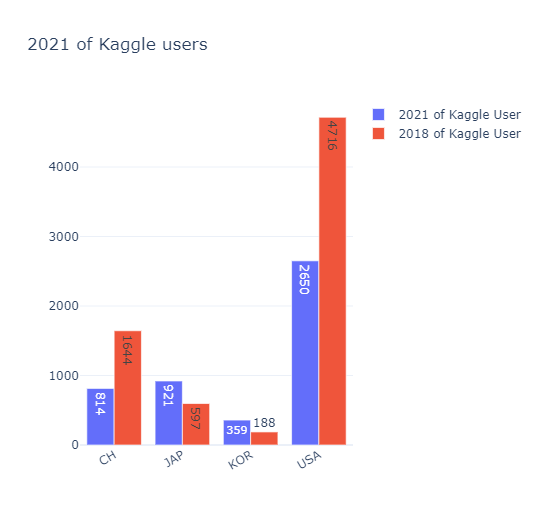

## 1. 분석결과
* 미국과 중국의 경우 21년 응답자 수가 2018년에 비해 절반 가까이 줄었다.
* 반면 한국과 일본의 경우 2배 가까이 증가했다.
* 이를 통해 중국과 미국에서는 Kaggle 이용자가 점차 줄어드는 반면 한국과 일본에서는 점차 증가할것으로 예상된다.

## 2. 한국, 중국, 일본, 미국의 연령대 비교
* IT및 빅데이터 분석 기반 산업은 미국이 주도하고 있다.
* 후발주자로서 한중일이 이 분야에 많은 투자를 하고 있다.
* 국가별 Kaggle 이용자의 연령분포를 비교해보면 현 분야에 3개국이 얼마나 많은 관심을 보이는지 알수 있다.
* 또한 연령대별 비교자료가 추후 분석해야할 프로그래밍 기간, 학위 수준, 주요 직종군, 급여 등을 알려주는 지표로 작용할 수 있을 것으로 기대된다.

In [ ]:
q3_q1 = df_2021_data.groupby(['Q3', 'Q1']).size().reset_index().rename(columns = {0:"Count"})

def get_pnt(data, country):
    data_country = data[data['Q3'] == country].reset_index(drop = True)
    data_country['percentage'] = data_country["Count"] / data_country["Count"].sum()
    data_country['%'] = np.round(data_country['percentage'] * 100, 1)
    
    return data_country

usa_df = get_pnt(q3_q1, "USA")
china_df = get_pnt(q3_q1, "CH")
japan_df = get_pnt(q3_q1, "JAP")
korea_df = get_pnt(q3_q1, "KOR")

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("USA with Q1", "China with Q1", "Japan with Q1", "Korea with Q1"), column_widths = [2, 2],
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                          [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = usa_df['Q1'], 
                     values = usa_df['%'], 
                     ),  row = 1, col = 1)

fig.add_trace(go.Pie(labels = china_df['Q1'], 
                     values = china_df['%'], 
                      ), row = 1, col = 2)

fig.add_trace(go.Pie(labels = japan_df['Q1'], 
                     values = japan_df['%'], 
                    ),  row = 2, col = 1)

fig.add_trace(go.Pie(labels = korea_df['Q1'], 
                     values = korea_df['%'], 
                     ), row = 2, col = 2)
fig.update_layout(height = 1000,
                  showlegend=True,
                 template = "plotly_white")

fig.show()

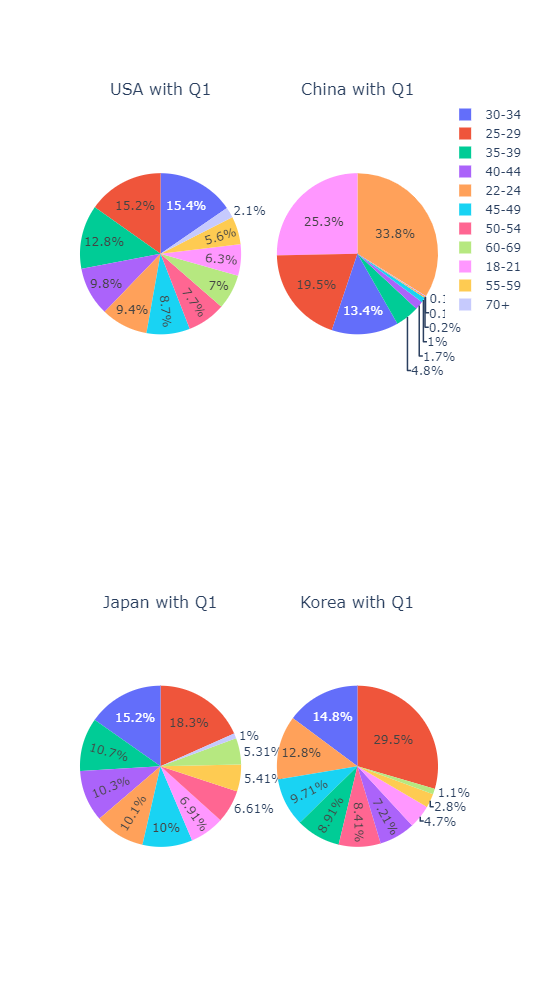

### 분석결과
* 미국에서는 오래전부터 해당 분야의 발전이 있었음을 알 수 있다. 특히 22~49세라는 응답이 71.3%로 가장 많았다. 데이터 분석 및 IT 산업에 많은 사람들이 참여하고 있으며, 동시에 발전도 상당히 높은 것으로 예상할 수 있다.
* 일본의 경우 분포가 미국과 상당히 비슷해 22~49세라고 답한 비율이 74.4%로 미국보다 3.1% 높았다. 다만 세부 평균 연령 분포에서는 두 나라의 차이가 나타났다. 
* 미국의 경우 30세 이상 인구의 69.1%, 30세 이상 인구의 63.5%가 5.6%로 미국을 앞서고 있다.
* 중국의 경우 젊은 세대의 비중이 상대적으로 컸다. 18세에서 39세 사이의 비율은 96.8%에 달했다. 
* 이것은 나중에 분석될 데이터의 결과와 큰 상관관계를 보여준다.
* 한국의 경우 중장년층의 분포지도가 눈에 띈다. 21세 이하와 55세 이상의 연령층은 다른 나라에 비해 매우 적다. 이는 한국의 교육제도와 55세 이상 기업이 노후를 장려하는 문화를 생각해보면 알 수 있다. 
* 또한 카글 조사 응답자 대부분이 남성이었고, 한국 남성의 평균 군생활이 이해된다는 점을 고려할 때, 22~24세 분포의 12.8%에 비해 25~29세 응답자 29.5%는 이해가 간다. 
* 대부분의 응답자가 제대 후 25세부터 34세까지 현업에서 공부하며 취업을 희망하는 것으로 예상할 수 있다.

## 3.한·중·일·미 프로그래밍 활동의 분포 비교
* 4개국의 나이를 비교했다면 이번에는 국가별 프로그래밍 활동 기간을 본격적으로 비교한 것이다.
1. 미국의 경우 연령대와 비슷한 분포를 보일 것으로 예상된다.
2. 일본의 경우 미국과 비슷하지만 활동 기간 동안 짧은 경력 분포가 더 많을 것으로 예상된다.
3. 중국의 경우 젊은 세대가 많은 만큼 단기간 분포가 클 것이다.
4. 한국의 경우 중국과 비슷하거나 그 이상이 될 것이다.

In [ ]:
q3_q6 = df_2021_data.groupby(['Q3', 'Q6']).size().reset_index().rename(columns = {0:"Count"})

def get_pnt(data, country):
    data_country = data[data['Q3'] == country].reset_index(drop = True)
    data_country['percentage'] = data_country["Count"] / data_country["Count"].sum()
    data_country['%'] = np.round(data_country['percentage'] * 100, 1)
    
    return data_country

usa_df = get_pnt(q3_q6, "USA")
china_df = get_pnt(q3_q6, "CH")
japan_df = get_pnt(q3_q6, "JAP")
korea_df = get_pnt(q3_q6, "KOR")

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("USA with Q6", "China with Q6", "Japan with Q6", "Korea with Q6"), column_widths = [2, 2],
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                          [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = usa_df['Q6'], 
                     values = usa_df['%'], 
                     ),  row = 1, col = 1)

fig.add_trace(go.Pie(labels = china_df['Q6'], 
                     values = china_df['%'], 
                      ), row = 1, col = 2)

fig.add_trace(go.Pie(labels = japan_df['Q6'], 
                     values = japan_df['%'], 
                    ),  row = 2, col = 1)

fig.add_trace(go.Pie(labels = korea_df['Q6'], 
                     values = korea_df['%'], 
                     ), row = 2, col = 2)
fig.update_layout(height = 1000,
                  showlegend=True,
                 template = "plotly_white")

fig.show()

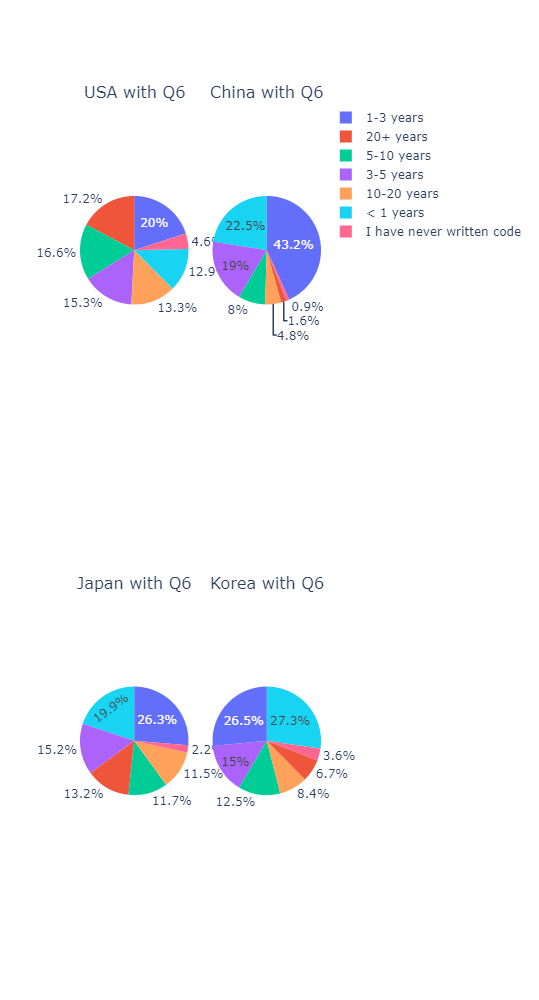

### 분석결과
* 미국의 경우 예상대로 연령대와 다소 관련이 있는 비율이었다. 활동기간은 대부분 고르게 분포되어 있으며, 1년 미만이라는 응답이 12.9%로 가장 많았다. 특히 나머지 3개국에 비해 10~20% 이상이라고 답한 비율이 30.5%에 달했다.
* 일본의 경우 미국처럼 분포가 고르게 분포되어 있지만 세부 분포에서는 차이가 있었다. 가장 눈에 띄는 것은 1년 미만에서 3년 미만까지의 비율이다. 미국은 32.9%, 일본은 46.2%를 차지했다. 이는 위의 연령대 응답 분포와 더 큰 차이가 있는 것으로 보인다. 한 가지 예상할 수 있는 것은 데이터 분석 분야가 미국보다 늦게 발달하기 시작했고, 산업이 발전하면서 다른 직업과 전공을 가진 사람들이 프로그래밍을 시작했다는 것이다.
* 중국의 경우 5년 미만이라는 응답이 84.7%로 가장 많았다. 또한 경력 10년 이상이라는 응답은 6.4%에 불과했다. 이는 현재 중국에서 IT 및 빅데이터 분야에 대한 많은 관심과 투자가 이루어지고 있음을 짐작할 수 있다.
* 우리나라의 경우 5년 미만이라는 응답이 68.8%로 중국에 비해 상대적으로 적었다. 특히 경력 1년 미만이라는 응답 비율이 높았다. 국내 카글에 대한 인지도, 국내에서 열리는 각종 빅데이터 분석대회, 대학·기업·공공기관 등이 개최하는 대회 등 대체 매체가 있기 때문일 것으로 예상된다.

## 4. 한국, 중국, 일본, 미국의 카글 사용자들의 학위 분포 비교
* 이것은 한국, 중국, 일본, 미국의 데이터 분야 응답자의 학위 수준 분포 비교입니다.
* 데이터 분야의 학위 수준을 4개국별로 분석해 주요 직종 및 급여 수준과의 연관성을 비교한다.

In [ ]:
q3_q4 = df_2021_data.groupby(['Q3', 'Q4']).size().reset_index().rename(columns = {0:"Count"})

def get_pnt(data, country):
    data_country = data[data['Q3'] == country].reset_index(drop = True)
    data_country['percentage'] = data_country["Count"] / data_country["Count"].sum()
    data_country['%'] = np.round(data_country['percentage'] * 100, 1)
    
    return data_country

usa_df = get_pnt(q3_q4, "USA")
china_df = get_pnt(q3_q4, "CH")
japan_df = get_pnt(q3_q4, "JAP")
korea_df = get_pnt(q3_q4, "KOR")

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("USA with Q4", "China with Q4", "Japan with Q4", "Korea with Q4"), column_widths = [2, 2],
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                          [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = usa_df['Q4'], 
                     values = usa_df['%'], 
                     ),  row = 1, col = 1)

fig.add_trace(go.Pie(labels = china_df['Q4'], 
                     values = china_df['%'], 
                      ), row = 1, col = 2)

fig.add_trace(go.Pie(labels = japan_df['Q4'], 
                     values = japan_df['%'], 
                    ),  row = 2, col = 1)

fig.add_trace(go.Pie(labels = korea_df['Q4'], 
                     values = korea_df['%'], 
                     ), row = 2, col = 2)
fig.update_layout(height = 1000,
                  showlegend=True,
                 template = "plotly_white")

fig.show()

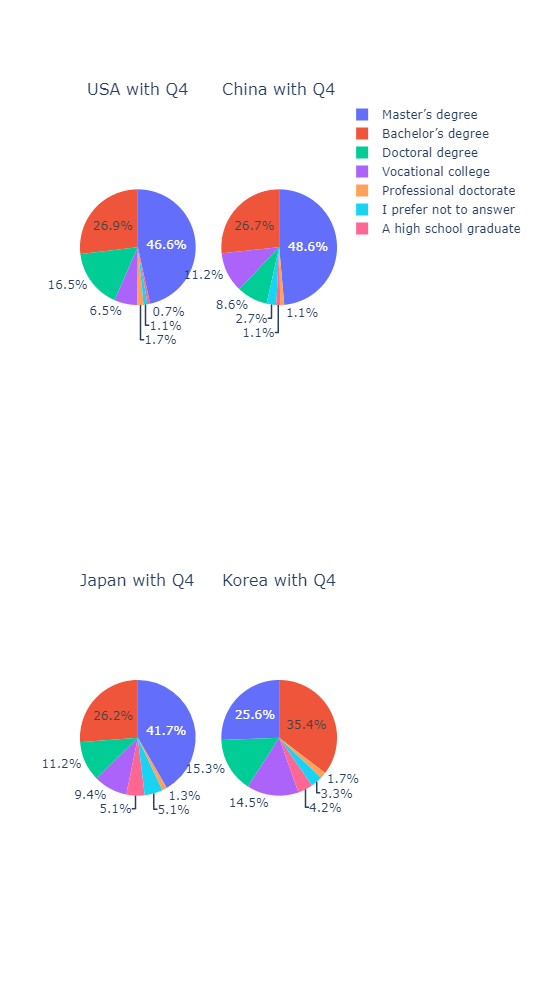

### 분석결과
* 한국을 제외한 석사 학위의 40% 이상이 미국, 중국, 일본에 분포되어 있다. 반면 한국은 학사학위 취득자의 비율이 35.4%로 가장 높았다.
* 박사학위 취득자 비율의 경우 중국이 8.6%로 가장 낮았고 나머지 국가에 10% 이상이 분포돼 있었다.
미국의 경우 학위 미달 비율이 가장 낮았고, 일본은 학위 미달 비율이 가장 높았다.
* 전반적인 교육수준이 높은 미국과 학사비율이 가장 높은 한국의 교육수준이 임금수준과 직업에 영향을 미칠 것으로 예상된다.

## 5. 한·중·일 데이터 분석 관련 직무분포 비교 related
* 빅데이터 분야는 현재 다양한 분야에서 활용되고 있다.
* 이와 관련해 점차 직종이 세분화되면서 IT 분야만을 넘어 1차, 2차, 3차 산업에까지 영향을 미치고 있다. 이러한 직업들의 국가별 분포를 비교하였다.

In [ ]:
q3_q5 = df_2021_data.groupby(['Q3', 'Q5']).size().reset_index().rename(columns = {0:"Count"})

def get_pnt(data, country):
    data_country = data[data['Q3'] == country].reset_index(drop = True)
    data_country['percentage'] = data_country["Count"] / data_country["Count"].sum()
    data_country['%'] = np.round(data_country['percentage'] * 100, 1)
    
    return data_country

usa_df = get_pnt(q3_q5, "USA")
china_df = get_pnt(q3_q5, "CH")
japan_df = get_pnt(q3_q5, "JAP")
korea_df = get_pnt(q3_q5, "KOR")

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("USA with Q5", "China with Q5", "Japan with Q5", "Korea with Q5"), column_widths = [2, 2],
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                          [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = usa_df['Q5'], 
                     values = usa_df['%'], 
                     ),  row = 1, col = 1)

fig.add_trace(go.Pie(labels = china_df['Q5'], 
                     values = china_df['%'], 
                      ), row = 1, col = 2)

fig.add_trace(go.Pie(labels = japan_df['Q5'], 
                     values = japan_df['%'], 
                    ),  row = 2, col = 1)

fig.add_trace(go.Pie(labels = korea_df['Q5'], 
                     values = korea_df['%'], 
                     ), row = 2, col = 2)
fig.update_layout(height = 1000,
                  showlegend=True,
                 template = "plotly_white")

fig.show()

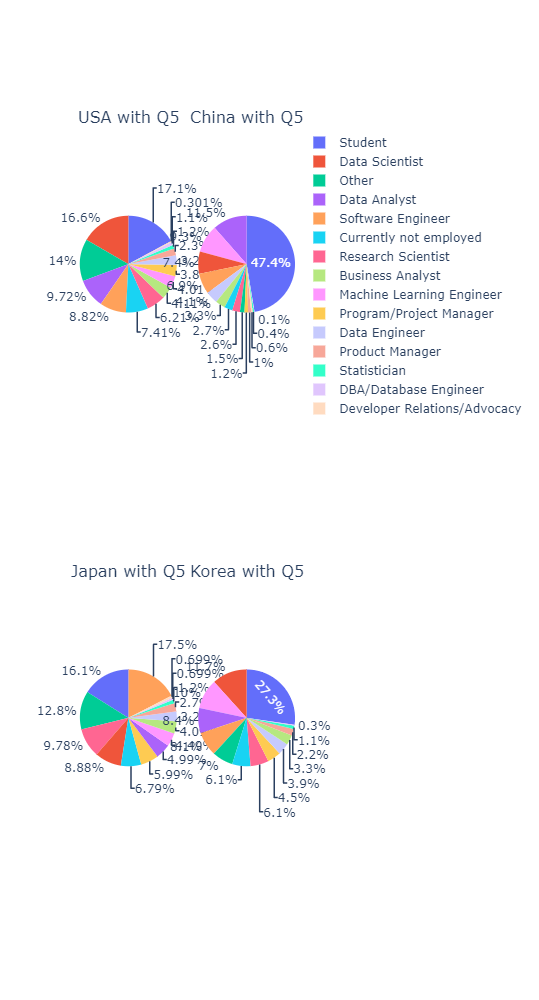

### 분석결과
* 미국의 경우 데이터 과학자와 데이터 분석가 비율이 상대적으로 높았다. 특이한 점은 사용자가 옵션에 없는 '기타' 옵션을 가장 많이 선택한다는 점이다. 앞서 언급했듯이 데이터 분석은 다양한 산업에서 활용되고 있어 직접 관련 산업이 아니더라도 빅데이터 분야가 활용되고 있다고 예상할 수 있고, 이에 따라 비선택직종 출신자들이 참여했다.
* 일본의 경우 미국과 대비되는 차이가 있었다. 소프트웨어 엔지니어가 응답한 비율입니다. 대부분의 소프트웨어 엔지니어는 일반적으로 개발자로 분류된다. 이는 일본이 데이터 분석을 전문으로 하는 일자리가 많지 않고 클래식 개발자 분야에서 이 분야를 선도하고 있음을 보여준다.
* 중국의 경우 학생 비율이 압도적으로 높았다. 또한 학생을 제외한 상위 3개 직종은 빅데이터 분야의 전문지식이 필요한 것으로 나타났다. 이를 통해 다시 한번 중국이 현재 빅데이터 분야에 투자와 관심을 갖고 있음을 알 수 있다.
* 한국의 경우 중국과 큰 차이가 없었다. 세부적으로는 중국보다 다양한 분야의 빅데이터에 관심을 보이고 있다.

## 한국, 중국, 일본 vs. 미국 사용자의 급여 수준 비교
* 빅데이터 분야는 현재 한국에서 가장 인기 있는 직업이자 동시에 많은 연봉을 받을 수 있는 직업으로 알려져 있다.
* 나라마다 일반적인 국가 수준은 다르지만 위의 정도, 경력, 직업에 따라 상당한 차이를 확인할 수 있을 것으로 예상된다.

In [ ]:
df_2021_data.loc[df_2021_data['Q25'] == '$0-999' , 'Q25'] = '0-4,999'
df_2021_data.loc[df_2021_data['Q25'] == '1,000-1,999' , 'Q25'] = '0-4,999'
df_2021_data.loc[df_2021_data['Q25'] == '2,000-2,999' , 'Q25'] = '0-4,999'
df_2021_data.loc[df_2021_data['Q25'] == '3,000-3,999' , 'Q25'] = '0-4,999'
df_2021_data.loc[df_2021_data['Q25'] == '4,000-4,999' , 'Q25'] = '0-4,999'
df_2021_data.loc[df_2021_data['Q25'] == '5,000-7,499' , 'Q25'] = '5,000-9,999'
df_2021_data.loc[df_2021_data['Q25'] == '7,500-9,999' , 'Q25'] = '5,000-9,999'
df_2021_data.loc[df_2021_data['Q25'] == '10,000-14,999'  , 'Q25'] = '10,000-19,999'
df_2021_data.loc[df_2021_data['Q25'] == '15,000-19,999' , 'Q25'] = '10,000-19,999'
df_2021_data.loc[df_2021_data['Q25'] == '20,000-24,999'  , 'Q25'] = '20,000-29,999'
df_2021_data.loc[df_2021_data['Q25'] == '25,000-29,999' , 'Q25'] = '20,000-29,999'
df_2021_data.loc[df_2021_data['Q25'] == '150,000-199,999' , 'Q25'] = '150,000-249,999'
df_2021_data.loc[df_2021_data['Q25'] == '200,000-249,999' , 'Q25'] = '150,000-249,999'
df_2021_data.loc[df_2021_data['Q25'] == '250,000-299,999' , 'Q25'] = '250,000-499,999'
df_2021_data.loc[df_2021_data['Q25'] == '300,000-499,999' , 'Q25'] = '250,000-499,999'
df_2021_data.loc[df_2021_data['Q25'] == '$500,000-999,999' , 'Q25'] = '> 500000'
df_2021_data.loc[df_2021_data['Q25'] == '>$1,000,000' , 'Q25'] = '> 500000'

In [ ]:
df_2021_data_2=df_2021_data.dropna(subset=['Q25'])

In [ ]:
q3_q25 = df_2021_data_2.groupby(['Q3', 'Q25']).size().reset_index().rename(columns = {0:"Count"})

def get_pnt(data, country):
    data_country = data[data['Q3'] == country].reset_index(drop = True)
    data_country['percentage'] = data_country["Count"] / data_country["Count"].sum()
    data_country['%'] = np.round(data_country['percentage'] * 100, 1)
    
    return data_country

usa_df = get_pnt(q3_q25, "USA")
china_df = get_pnt(q3_q25, "CH")
japan_df = get_pnt(q3_q25, "JAP")
korea_df = get_pnt(q3_q25, "KOR")

In [ ]:
fig = make_subplots(rows = 2, cols = 2, 
                    shared_xaxes=True, 
                    shared_yaxes=True, 
                    vertical_spacing = 0.05,
                    subplot_titles=("USA with Q25", "China with Q25", "Japan with Q25", "Korea with Q25"),
                    column_widths = [0.5, 0.5]) 

fig.add_trace(go.Bar(x = usa_df['Q25'], 
                     y = usa_df['%'], 
                     text = usa_df['%'].astype(str) + "%", 
                     textposition='outside'), 
              row = 1, col = 1)

fig.add_trace(go.Bar(x = china_df['Q25'], 
                     y = china_df['%'], 
                     text = china_df['%'].astype(str) + "%", 
                     textposition='outside'), 
              row = 1, col = 2)

fig.add_trace(go.Bar(x = japan_df['Q25'], 
                     y = japan_df['%'], 
                     text = japan_df['%'].astype(str) + "%", 
                     textposition='outside'), 
              row = 2, col = 1)

fig.add_trace(go.Bar(x = korea_df['Q25'], 
                     y = korea_df['%'], 
                     text = korea_df['%'].astype(str) + "%", 
                     textposition='outside'), 
              row = 2, col = 2)
fig.update_xaxes(categoryorder='array', categoryarray= [ '0-4999','5,000-9,999', '10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999'
,'60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-249,999','250,000-499,999','> 500000'])


fig.update_layout(height = 1000,
                  showlegend=False,
                 template = "plotly_white")

fig.show()

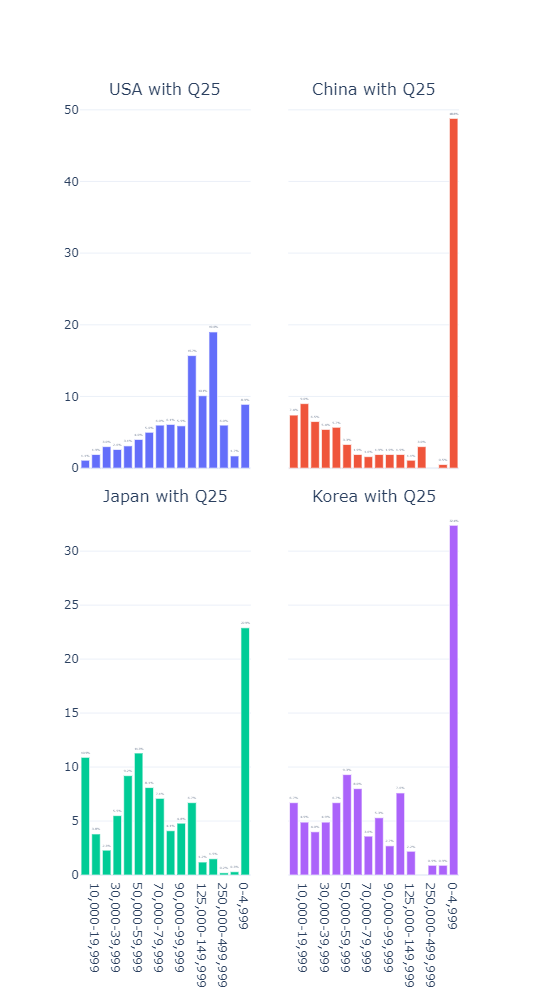

### 분석결과
* 미국에서, 급여 수준 분포에서 상위 3개 항목의 44.8%는 다음과 같다.
10만에서 25만. 25만~50만명으로 7.7%로 압도적으로 높다는 점도 중요한 부분이다. 이는 미국 내 프로그래밍 기간 분포와 어느 정도 관련이 있는 것으로 보이며, 5~20년 이상 프로그래밍 기간으로 응답한 이용자가 47.1%로 10만~25만명에 육박하는 것으로 나타났다. 물론 재직 기간이 아닌 프로그래밍 기간이기 때문에 프로그래밍 기간이 가장 긴 미국의 카글 사용자들은 약간의 오류를 감안하더라도 높은 수준의 급여를 받는 것으로 보인다.
* 일본과 한국의 경우 그래프 형태가 매우 비슷합니다. 0~4999달러의 분포가 가장 크고, 상위 5개의 분포가 그 뒤를 잇는다. 이는 일본과 한국의 급여 수준이 비슷한 영향이 컸던 것으로 보인다.
* 한·중·일 3국의 취업 분포에서 0대 4,999로 가장 높은 비율이 학생 비율에 가깝다. 중국은 47.4%, 일본은 16.1%, 한국은 27.3%로 학생들의 응답 비율이 급여수준에 대한 응답에 큰 역할을 한 것으로 보인다.

## 분석에 대한 검토
* 한국, 미국, 중국, 일본이 4개국을 비교했다. 비교분석 전 예상된 수치와 일부 유사점이 있었지만 흥미로운 부분도 발견됐다.
* 응답자 수가 5년 미만이었던 한국의 경우 중국과 달리 4만 달러 이상이라는 답변이 대다수였다.
여기에 학생을 제외한 상위 3개 항목이 데이터 분석이라는 점을 감안하면 현재 국내에서 상당히 고액 연봉 직종임을 알 수 있다.
* 여기에 경력 5년 미만이고 학사율이 가장 높은 우리나라 상황을 살펴보면 경력, 학위, 직업 다양화, 급여 수준도 시간이 지날수록 급성장할 수 있다는 기대를 할 수 있다.
* 다만 최고 연봉에 있어서는 한중일 3국이 여전히 부족해 보인다. 반면에, 미국이 가장 높은 급여를 지불한다. 그러나 미국의 데이터 필드 진입 사용자 수는 다른 국가에 비해 적다. 다시 말해 한국, 중국, 일본 3개국의 학생들이 많은 것을 공부하고 경험하며 미국에 진출하는 좋은 시각을 가지고 있는 것 같다.
* 중국의 경우 데이터 분야 발전에서 가장 후발주자의 모습을 보여주고 있었다. 앞으로 학생 비중이 높고, 데이터 분석에만 집중한 직군 분포, 임금 0~4999달러가 전체 응답자의 절반을 넘겠지만, 현장 진출을 위해 공부하면서 많은 이용자가 빠르게 성장할 것으로 기대된다.